In [ ]:
 from sklearn.datasets import make_classification

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from collections import Counter

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X , y=make_classification(n_samples=100000,n_features=32,n_informative=32,n_redundant=0,n_clusters_per_class=1,weights=[0.995,0.005],class_sep=0.5,random_state=0)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("The number of records in the training dataset is",X_train.shape[0])
print("The number of records in the dataset is",X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records ")

The number of records in the training dataset is 80000
The number of records in the dataset is 20000
The training dataset has 79200 records 


In [ ]:
X_train

array([[-3.75949643e+00, -3.78605852e-01, -1.46362879e+00, ...,
         2.70382420e+00,  1.78280865e+00,  2.63419776e-01],
       [-6.32129714e+00, -2.28430570e+00, -5.14184296e-01, ...,
        -3.08761234e+00, -2.13422351e-03,  3.06975030e+00],
       [ 3.63680373e+00,  5.81323126e+00, -3.81501159e-01, ...,
        -4.08324707e+00, -1.31913802e+00,  5.24207380e+00],
       ...,
       [ 2.11795713e+00, -6.87902640e+00, -1.34571204e+00, ...,
         3.31142601e+00, -7.73686609e-02, -6.67414603e+00],
       [-1.61331210e-01, -3.23563815e+00, -4.34442763e+00, ...,
        -3.89822446e-01, -1.21105090e+00, -9.30390350e-02],
       [ 2.21867298e-01, -1.21181512e+00, -3.19728190e+00, ...,
         5.88137865e+00, -2.40009494e+00, -1.94711318e+00]])

In [ ]:
X_train.shape

(80000, 32)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report

In [ ]:
X_train_normal=X_train[np.where(y_train==0)]
input=keras.layers.Input(shape=(32,))

In [ ]:
encoder=Sequential([Dense(16,activation='relu'),Dense(8,activation='relu'),Dense(4,activation='relu')])(input)

In [ ]:
decoder=Sequential([Dense(8,activation='relu'),Dense(16,activation='relu'),Dense(32,activation='relu')])(encoder)

In [ ]:
autoencoder=keras.Model(inputs=input,outputs=decoder)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 sequential (Sequential)     (None, 4)                 700       
                                                                 
 sequential_1 (Sequential)   (None, 32)                728       
                                                                 
Total params: 1428 (5.58 KB)
Trainable params: 1428 (5.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam',loss='mae')

In [ ]:
history=autoencoder.fit(X_train_normal,X_train_normal,epochs=20,batch_size=64,validation_data=(X_test, X_test),shuffle=True)

Epoch 1/20
1238/1238 [==============================] - 3s 3ms/step - loss: 2.3111 - val_loss: 2.3051
Epoch 2/20
1238/1238 [==============================] - 3s 3ms/step - loss: 2.2994 - val_loss: 2.2983
Epoch 3/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.2918 - val_loss: 2.2903
Epoch 4/20
1238/1238 [==============================] - 4s 3ms/step - loss: 2.2849 - val_loss: 2.2843
Epoch 5/20
1238/1238 [==============================] - 3s 3ms/step - loss: 2.2788 - val_loss: 2.2783
Epoch 6/20
1238/1238 [==============================] - 3s 3ms/step - loss: 2.2750 - val_loss: 2.2758
Epoch 7/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.2723 - val_loss: 2.2757
Epoch 8/20
1238/1238 [==============================] - 4s 3ms/step - loss: 2.2703 - val_loss: 2.2721
Epoch 9/20
1238/1238 [==============================] - 3s 3ms/step - loss: 2.2688 - val_loss: 2.2711
Epoch 10/20
1238/1238 [==============================] - 5s 4ms/step - loss: 2.267

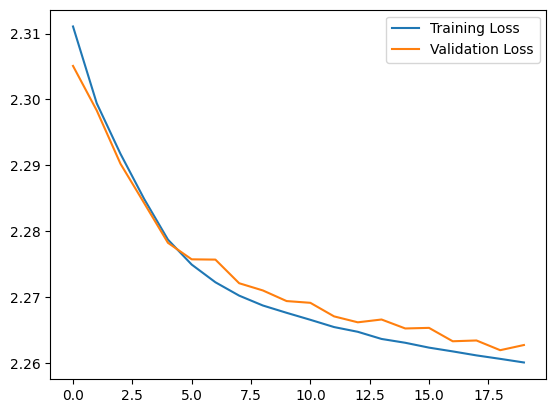

In [ ]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

625/625 [==============================] - 2s 3ms/step
The prediction loss threshold for 2% of outliers is 3.20


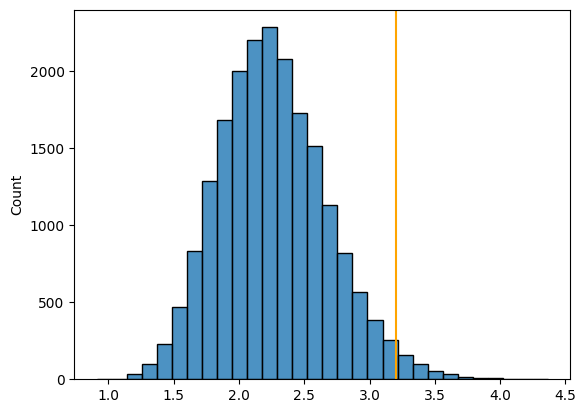

In [ ]:
prediction=autoencoder.predict(X_test)
prediction_loss=keras.losses.mae(prediction,X_test)
loss_threshold=np.percentile(prediction_loss,98)
print(f'The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}')
sns.histplot(prediction_loss,bins=30,alpha=0.8)
plt.axvline(x=loss_threshold,color='orange')

In [ ]:
threshold_prediction=[0 if i < loss_threshold else 1 for i in prediction_loss]
print(classification_report(y_test,threshold_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19803
           1       0.01      0.02      0.01       197

    accuracy                           0.97     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.97      0.98     20000

